## Data Scientist Case Study
<p style='text-align: justify;'>
A customer wants to be able to identify items corresponding to their label == 1 from their products. They need to be able to screen them with a high recall, that is avoiding false negatives.

 

They have measured a set of items (labeled by sample_id) with multiple sensors (labeled by sensor_id).

 

Do a quick feasibility study.

    * How accurately can the labels be identified in this dataset?
    * Is the dataset large and diverse enough? Please elaborate on why your answer is yes or no.
    * How would you scale this to a production model? 

The model needs to be able to make the prediction only based on the feature values, i.e., it cannot use the parameters ‘sample’ and ‘sensor id'.

Use Python plus Python packages to realize your solution.</p>



### Structure
* **Import libraries and setup Dataframes**
* **Exploratory data analysis (EDA)**
* **Prepare the Data (preprocessing)**
* **Choose the model**
* **Train the model**
* **Make prediction**
* **Summary of Results** 


### Import Libraries & Setup Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [2]:
# Import data
df = pd.read_csv("exercise.csv")


# check the data
df.head(3)
#df_test.shape

,sensor_id,sample_id,label,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,...,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200
0,0,0,-1,0.3382,0.3386,0.3391,0.3396,0.3403,0.3411,0.3420,...,0.4345,0.4340,0.4333,0.4324,0.4312,0.4299,0.4283,0.4267,0.4249,0.4232
1,1,0,-1,0.4883,0.4888,0.4896,0.4905,0.4915,0.4925,0.4937,...,0.5722,0.5714,0.5707,0.5698,0.5687,0.5673,0.5658,0.5641,0.5624,0.5605
2,2,0,-1,0.4875,0.4882,0.4891,0.4899,0.4910,0.4922,0.4935,...,0.5784,0.5777,0.5768,0.5757,0.5743,0.5728,0.5711,0.5693,0.5678,0.5663


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Columns: 204 entries, sensor_id to feature_200
dtypes: float64(201), int64(3)
memory usage: 900.6 KB


In [4]:
df.shape

(565, 204)

### Exploratory data analysis (EDA)

Text(0.5, 1.0, 'Target variable count')

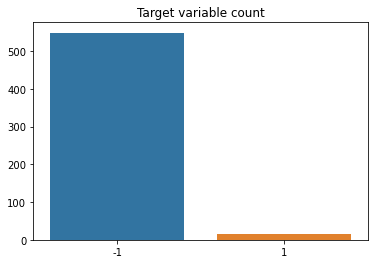

In [5]:
x=df['label'].value_counts().values
sns.barplot([-1,1],x)
plt.title('Target variable count')

* There is clearly a class imbalace problem.
*  We will look into methods of solving this issue later in this notebook.
 

### Make balance dataset

Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.


In [6]:
df.drop(['sensor_id','sample_id'], axis =1, inplace= True)

# check the data
df.head(3)
#df_test.shape

,label,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200
0,-1,0.3382,0.3386,0.3391,0.3396,0.3403,0.3411,0.3420,0.3430,0.3441,...,0.4345,0.4340,0.4333,0.4324,0.4312,0.4299,0.4283,0.4267,0.4249,0.4232
1,-1,0.4883,0.4888,0.4896,0.4905,0.4915,0.4925,0.4937,0.4949,0.4963,...,0.5722,0.5714,0.5707,0.5698,0.5687,0.5673,0.5658,0.5641,0.5624,0.5605
2,-1,0.4875,0.4882,0.4891,0.4899,0.4910,0.4922,0.4935,0.4950,0.4965,...,0.5784,0.5777,0.5768,0.5757,0.5743,0.5728,0.5711,0.5693,0.5678,0.5663


In [7]:
# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy='minority')
# X = df.drop(['label'], axis=1)
# y = df['label']

# # define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy='minority')
# # fit and apply the transform
# X_over, y_over = oversample.fit_resample(X, y)

# df=pd.concat([X_over,y_over],axis=1)

In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
X = df.drop(['label'], axis=1)
y = df['label']

# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.1)
# fit and apply the transform
X, y = over.fit_resample(X, y)

# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X, y = under.fit_resample(X, y)

df=pd.concat([X,y],axis=1)

Text(0.5, 1.0, 'Target variable count')

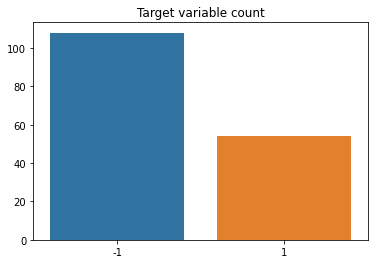

In [9]:
x=df['label'].value_counts().values
sns.barplot([-1,1],x)
plt.title('Target variable count')

In [10]:
df.shape

(162, 202)

In [11]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,label
0,0.4123,0.4122,0.4122,0.4125,0.4127,0.4132,0.4137,0.4144,0.4153,0.4164,...,0.4475,0.4470,0.4466,0.4460,0.4455,0.4452,0.4446,0.4443,0.4439,-1
1,0.3680,0.3686,0.3694,0.3702,0.3712,0.3723,0.3734,0.3747,0.3760,0.3774,...,0.4373,0.4376,0.4376,0.4374,0.4369,0.4362,0.4353,0.4341,0.4327,-1
2,0.4835,0.4833,0.4834,0.4836,0.4838,0.4842,0.4847,0.4852,0.4859,0.4868,...,0.5516,0.5514,0.5513,0.5511,0.5508,0.5505,0.5503,0.5497,0.5491,-1
3,0.5086,0.5085,0.5086,0.5088,0.5091,0.5096,0.5102,0.5112,0.5122,0.5135,...,0.5582,0.5577,0.5572,0.5567,0.5565,0.5561,0.5559,0.5558,0.5558,-1
4,0.5151,0.5151,0.5151,0.5154,0.5157,0.5163,0.5169,0.5178,0.5188,0.5200,...,0.5404,0.5400,0.5396,0.5392,0.5389,0.5386,0.5383,0.5382,0.5382,-1


### Checking Data distribution

As we have 200 features in dataset, we are not able to one by one check visually distribution of each features. So we should at least be able to answer two main questions:

* Is there any outliers in our features? 
* Can we drop some features in our dataset to make simpler our machine learning model?



### checking outliers

At first lets to check if there are any missing values in our dataset


In [12]:
# Check where we find NaN values

tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column Type'}) 
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                                       rename(index={0: 'null values (%)'}))
tab_info

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,label
column Type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.isnull().sum()

feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
              ..
feature_197    0
feature_198    0
feature_199    0
feature_200    0
label          0
Length: 202, dtype: int64

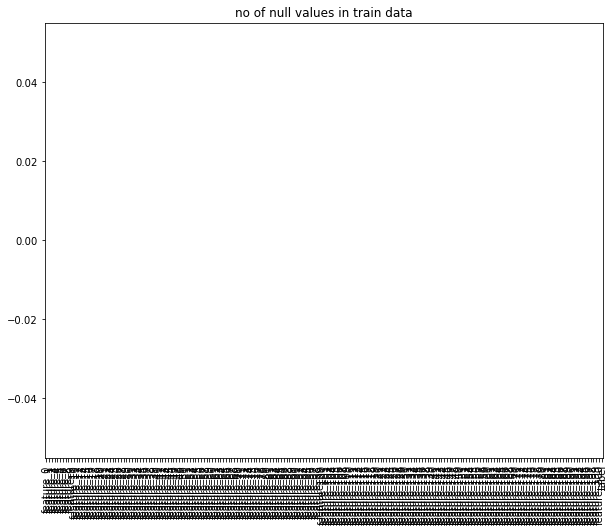

In [14]:
df.isna().sum().plot(kind="bar",figsize=(10, 8))
plt.title("no of null values in train data")
plt.show()



No missing values, that's great. Next we can look at outliers in the features and remove them from dataset as it can influence on the accuracy of the machine learning model.

In [15]:
df.shape

(162, 202)

In [16]:
from scipy import stats

def drop_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh).all(axis=1)
   # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)
drop_outliers(df)

In [17]:
df.shape

(156, 202)

### DImentinality reduction

One way to simplify our model is remove the features from dataset that do not have an important influence on the target feature. One way to understand the influence of each feature on target feature is calculating correlation heatmap. And if a feature has a low correlation to target feature, we can remove it from the dataset.  


In [18]:
cor = df.corr()
cor

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,label
feature_0,1.000000,0.999998,0.999993,0.999985,0.999974,0.999962,0.999947,0.999926,0.999890,0.999833,...,0.980125,0.979877,0.979667,0.979496,0.979388,0.979342,0.979364,0.979415,0.979571,0.085298
feature_1,0.999998,1.000000,0.999998,0.999993,0.999985,0.999975,0.999961,0.999940,0.999905,0.999845,...,0.980296,0.980050,0.979842,0.979673,0.979565,0.979520,0.979542,0.979591,0.979746,0.084929
feature_2,0.999993,0.999998,1.000000,0.999998,0.999993,0.999985,0.999973,0.999953,0.999917,0.999857,...,0.980485,0.980242,0.980036,0.979867,0.979761,0.979715,0.979737,0.979785,0.979939,0.084549
feature_3,0.999985,0.999993,0.999998,1.000000,0.999998,0.999993,0.999983,0.999965,0.999930,0.999869,...,0.980735,0.980494,0.980290,0.980123,0.980017,0.979971,0.979991,0.980038,0.980190,0.084093
feature_4,0.999974,0.999985,0.999993,0.999998,1.000000,0.999998,0.999991,0.999976,0.999944,0.999887,...,0.980917,0.980676,0.980471,0.980304,0.980197,0.980150,0.980169,0.980214,0.980363,0.084157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_197,0.979342,0.979520,0.979715,0.979971,0.980150,0.980319,0.980398,0.980391,0.980317,0.980122,...,0.999930,0.999956,0.999975,0.999989,0.999997,1.000000,0.999996,0.999983,0.999956,-0.010687
feature_198,0.979364,0.979542,0.979737,0.979991,0.980169,0.980335,0.980412,0.980400,0.980320,0.980119,...,0.999904,0.999933,0.999955,0.999974,0.999987,0.999996,1.000000,0.999995,0.999976,-0.011786
feature_199,0.979415,0.979591,0.979785,0.980038,0.980214,0.980378,0.980451,0.980435,0.980350,0.980144,...,0.999866,0.999898,0.999924,0.999948,0.999966,0.999983,0.999995,1.000000,0.999993,-0.013005
feature_200,0.979571,0.979746,0.979939,0.980190,0.980363,0.980525,0.980595,0.980576,0.980488,0.980278,...,0.999820,0.999853,0.999880,0.999909,0.999932,0.999956,0.999976,0.999993,1.000000,-0.013748


In [23]:
# Correlation heatmap
cor = df.corr()

cor_target = abs(cor["label"])

relevant_features = cor_target[cor_target>0.30]
correlated_feature_variable_names = relevant_features.index

In [24]:
correlated_feature_variable_names

Index(['feature_118', 'feature_119', 'feature_120', 'feature_121',
       'feature_122', 'feature_123', 'feature_124', 'feature_125',
       'feature_126', 'feature_127', 'feature_128', 'feature_129',
       'feature_130', 'feature_131', 'feature_132', 'feature_133',
       'feature_134', 'feature_135', 'feature_136', 'feature_137',
       'feature_138', 'feature_139', 'feature_140', 'feature_141',
       'feature_142', 'feature_143', 'feature_144', 'feature_145',
       'feature_146', 'feature_147', 'label'],
      dtype='object')

In [25]:
df = df[correlated_feature_variable_names]
df.shape

(156, 31)

In [26]:
import sklearn.model_selection as model_selection
X = df.drop(['label'], axis=1)
y = df['label']
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.65,test_size=0.35, random_state=101)
#train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])



### Logistic Regression

In [27]:
logit_model = LogisticRegression()
logit_model = logit_model.fit(x_train, y_train)
logit_model.score(x_train, y_train)
predicted = pd.DataFrame(logit_model.predict(x_test))
probs = pd.DataFrame(logit_model.predict_proba(x_test))


# Store metrics
logit_accuracy  = metrics.accuracy_score(y_test, predicted)
logit_roc_auc = metrics.roc_auc_score(y_test, probs[1])
logit_confus_matrix = metrics.confusion_matrix(y_test, predicted)
logit_classification_report = metrics.classification_report(y_test, predicted)
logit_precision = metrics.precision_score(y_test, predicted, pos_label=1)
logit_recall = metrics.recall_score(y_test, predicted, pos_label=1)
logit_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# evaluate the model using 10-fold cross-validation
logit_cv_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), x_test, y_test, scoring='precision', cv=10)
logit_cv_mean = np.mean(logit_cv_scores)

In [28]:
print( metrics.confusion_matrix(y_test, predicted))

[[34  7]
 [14  0]]


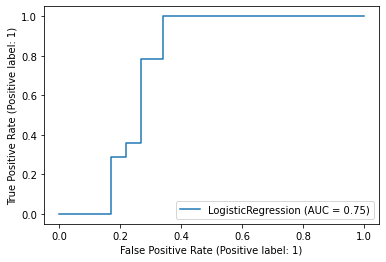

In [30]:
metrics.plot_roc_curve(logit_model, x_test, y_test)  


### Decision Tree

In [31]:

tree_model = tree.DecisionTreeClassifier(max_depth=3)
tree_model = tree_model.fit(x_train, y_train)
tree_model.score(x_train, y_train)


predicted = pd.DataFrame(tree_model.predict(x_test))
probs = pd.DataFrame(tree_model.predict_proba(x_test))

# Store metrics
tree_accuracy = metrics.accuracy_score(y_test, predicted)
tree_roc_auc = metrics.roc_auc_score(y_test, probs[1])
tree_confus_matrix = metrics.confusion_matrix(y_test, predicted)
tree_classification_report = metrics.classification_report(y_test, predicted)
tree_precision = metrics.precision_score(y_test, predicted, pos_label=1)
tree_recall = metrics.recall_score(y_test, predicted, pos_label=1)
tree_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# evaluate the model using 10-fold cross-validation
tree_cv_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), x_test, y_test, scoring='precision', cv=10)
tree_cv_mean = np.mean(tree_cv_scores)

In [32]:
print( metrics.confusion_matrix(y_test, predicted))

[[35  6]
 [ 0 14]]


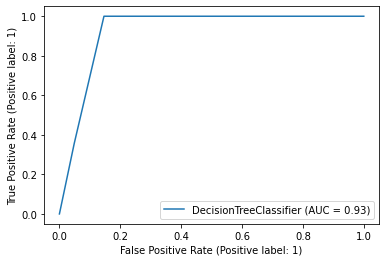

In [33]:
metrics.plot_roc_curve(tree_model, x_test, y_test)

### Random Forest

In [34]:
rf = RandomForestClassifier()    
rf_model = rf.fit(x_train, y_train)
rf_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(x_test))
probs = pd.DataFrame(rf_model.predict_proba(x_test))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)
rf_classification_report = metrics.classification_report(y_test, predicted)
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
rf_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, scoring='precision', cv=10)
rf_cv_mean = np.mean(rf_cv_scores)

In [35]:
print( metrics.confusion_matrix(y_test, predicted))

[[36  5]
 [ 0 14]]


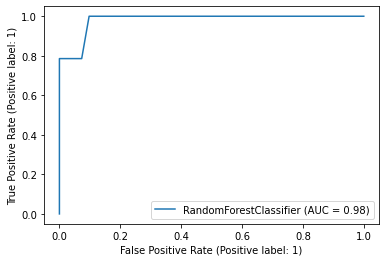

In [36]:
metrics.plot_roc_curve(rf_model, x_test, y_test)

### SUPPORT VECTOR MACHINE

In [37]:
svm_model = SVC(probability=True)
svm_model = svm_model.fit(x_train, y_train)
svm_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(svm_model.predict(x_test))
probs = pd.DataFrame(svm_model.predict_proba(x_test))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)
svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)
svm_classification_report = metrics.classification_report(y_test, predicted)
svm_precision = metrics.precision_score(y_test, predicted, pos_label=1)
svm_recall = metrics.recall_score(y_test, predicted, pos_label=1)
svm_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
svm_cv_scores = cross_val_score(SVC(probability=True), x_test, y_test, scoring='precision', cv=10)
svm_cv_mean = np.mean(svm_cv_scores)

In [38]:
print( metrics.confusion_matrix(y_test, predicted))

[[28 13]
 [ 0 14]]


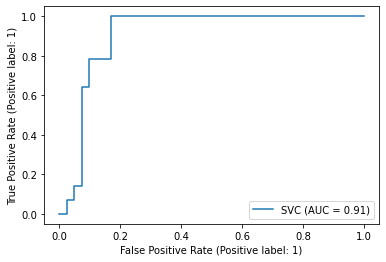

In [39]:
metrics.plot_roc_curve(svm_model, x_test, y_test)

### KNN

In [40]:
# instantiate learning model (k = 3)
knn_model = KNeighborsClassifier(n_neighbors=3)
# fit the model
knn_model.fit(x_train, y_train)
# Accuracy
knn_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(knn_model.predict(x_test))
probs = pd.DataFrame(knn_model.predict_proba(x_test))

# Store metrics
knn_accuracy = metrics.accuracy_score(y_test, predicted)
knn_roc_auc = metrics.roc_auc_score(y_test, probs[1])
knn_confus_matrix = metrics.confusion_matrix(y_test, predicted)
knn_classification_report = metrics.classification_report(y_test, predicted)
knn_precision = metrics.precision_score(y_test, predicted, pos_label=1)
knn_recall = metrics.recall_score(y_test, predicted, pos_label=1)
knn_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
knn_cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_test, y_test, scoring='precision', cv=10)
knn_cv_mean = np.mean(knn_cv_scores)

In [41]:
print( metrics.confusion_matrix(y_test, predicted))

[[36  5]
 [ 3 11]]


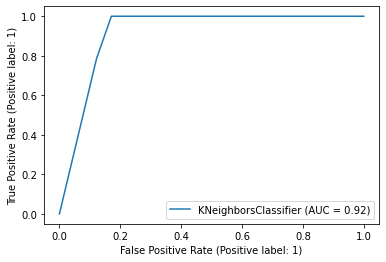

In [42]:
metrics.plot_roc_curve(knn_model, x_test, y_test)

### Results

In [39]:
# Model comparison
models = pd.DataFrame({
  'Model': ['Logistic', 'Decision Tree', 'Random.Forest.', 'SVM', 'kNN'],
  'Accuracy' : [logit_accuracy, tree_accuracy, rf_accuracy, svm_accuracy, knn_accuracy],
  'Precision': [logit_precision, tree_precision, rf_precision, svm_precision, knn_precision],
  'recall' : [logit_recall, tree_recall, rf_recall, svm_recall, knn_recall],
  'F1' : [logit_f1, tree_f1, rf_f1, svm_f1, knn_f1],
  'cv_precision' : [logit_cv_mean, tree_cv_mean, rf_cv_mean, svm_cv_mean, knn_cv_mean]
})
# Print table and sort by test precision
models.sort_values(by='Precision', ascending=False)


,Model,Accuracy,Precision,recall,F1,cv_precision
2,Random.Forest.,0.927273,0.789474,1.000000,0.882353,0.650000
1,Decision Tree,0.909091,0.777778,0.933333,0.848485,0.516667
4,kNN,0.854545,0.652174,1.000000,0.789474,0.516667
3,SVM,0.763636,0.535714,1.000000,0.697674,0.050000
0,Logistic,0.654545,0.250000,0.133333,0.173913,0.516667


## Summarising Results 


From the above results table, it is clear the Random Forest is the best model based on Accuracy, Precision and Recall metrics. The performance is so good, that I would be concerned about overfitting and a lack of generalisation to future periods of data. However, the classifier was evaluated with K-folds cross-validation (K=10) and also evaluated on the test dataset.